In [ ]:
#http://corysimon.github.io/articles/uniformdistn-on-sphere/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits import mplot3d

## Paramètres de jeu de données

In [51]:
param_y_normal_data = 1
param_y_abnormal_data = 0
contamination = 1/100 # 1%

#Normal data
size = 1500 #number of samples
small_cercle = 7 #Rayon
big_cercle = 9 #Rayon
x_values_interval = 15
y_values_interval = 12

#Abnormal data
contamination = 1/100 # 1%
size_a = int(size*contamination) #size of samples
a_max_cercle = 5 #Rayon
a_min_cercle = 4 #Rayon
x_a_values_interval = 12
y_a_values_interval = 9

x_lim = 6
y_lim = 6
z_lim = 7

file_name = "synthetic_3D_data_V4.2.0_"+str(datetime.now())
#full_file_path = str(datetime.now().date())+"/"+file_name+".csv"
full_file_path = file_name+".csv"

In [52]:
#Normal “continuous uniform” distribution dataset https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random_sample.html

c_n_dataset  = []
x_n_dataset = []
y_n_dataset = []
z_n_dataset = []

#thetha entre 0 et 2pi
thetha = np.random.uniform(0, 2*np.pi, size) 
#phi entre 0 et pi
phi = np.random.uniform(0, np.pi, size)
#r entre small_cercle et big_cercle
r = np.random.uniform(small_cercle, big_cercle, size)

i = 0
while i<size:
    c_n_dataset.append(param_y_normal_data)
    #x=rsin(ϕ)cos(θ)
    x = r[i] * np.sin(phi[i]) * np.cos(thetha[i])
    #x = r[i] * np.cos(phi[i]) * np.cos(thetha[i])
    x_n_dataset.append(x)
    #y=rsin(ϕ)sin(θ)
    y = r[i] * np.sin(phi[i]) * np.sin(thetha[i])
    #y = r[i] * np.cos(phi[i]) * np.sin(thetha[i])
    y_n_dataset.append(y)
    #z=rcos(ϕ)
    z = r[i] * np.cos(phi[i])
    #z = r[i] * np.sin(phi[i])
    z_n_dataset.append(z)
        
    #print("rayon = "+str(np.sqrt(x**2 + y**2 + z**2)))
    i = i + 1
n_data_array = {'0': x_n_dataset, '1':y_n_dataset, '2':z_n_dataset, 'is_normal': c_n_dataset}
n_dataset = pd.DataFrame(n_data_array, columns=['0', '1', '2', 'is_normal'])
#n_dataset


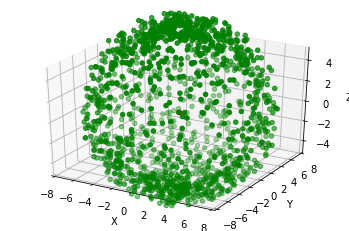

In [53]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

x_lim = 8
y_lim = 8
z_lim = 5

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-x_lim,x_lim)
ax.set_ylim(-y_lim,y_lim)
ax.set_zlim(-z_lim,z_lim)

ax.scatter3D(n_dataset['0'], n_dataset['1'], n_dataset['2'], c="g");
ax.scatter3D(0, 0, 0, c="r");

## Description

In [7]:
print("Jeu de données à 3 dimensions constitué de données normales et 1% de données anormales. ")
print("Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. ") 
print("Ici, les données anormales sont aléatoires et un peu éloignés des données normales.")

print("Données normales :")
print("- Données aléatoire uniforme")
print("- X1 entre -"+str(x_values_interval) +" et "+str(x_values_interval)+", ")
print("- X2 entre -"+str(y_values_interval) +" et "+str(y_values_interval)+", ")
print("- size = "+str(size)+", ")
print("- distance euclidienne entre "+str(small_cercle) +" et "+str(big_cercle)+" (Grand cercle de rayon "+str(big_cercle)+" et petit cercle de rayon "+str(small_cercle)+")")

print("Données anormales :")
print("- Données aléatoire uniforme")
print("- X1 entre -"+str(x_a_values_interval) +" et "+str(x_a_values_interval)+", ")
print("- X2 entre -"+str(y_a_values_interval) +" et "+str(y_a_values_interval)+", ")
print("- size = "+str(size_a)+", ")
print("- distance euclidienne inférieure à "+str(a_max_cercle)+"")

Jeu de données à 3 dimensions constitué de données normales et 1% de données anormales. 
Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. 
Ici, les données anormales sont aléatoires et un peu éloignés des données normales.
Données normales :
- Données aléatoire uniforme
- X1 entre -15 et 15, 
- X2 entre -12 et 12, 
- size = 1500, 
- distance euclidienne entre 2 et 7 (Grand cercle de rayon 7 et petit cercle de rayon 2)
Données anormales :
- Données aléatoire uniforme
- X1 entre -12 et 12, 
- X2 entre -9 et 9, 
- size = 15, 
- distance euclidienne inférieure à 5


## Normal dataset generation

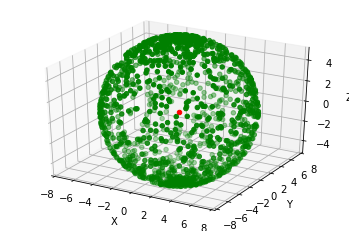

In [47]:
#Normal “continuous uniform” distribution dataset https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random_sample.html

y_n_dataset  = []
x1_n_dataset = []
x2_n_dataset = []
x3_n_dataset = []
i = 0
while i<size:
    found = False
    while not found:
        #longitude entre 0 et 2pi
        longitude = np.random.uniform(-x_values_interval, x_values_interval, 1) 
        #(x_values_interval--x_values_interval) * np.random.random_sample() + -x_values_interval
        #latitude entre -pi/2 et pi/2
        latitude = (y_values_interval --y_values_interval) * np.random.random_sample() + -y_values_interval

        x1 = big_cercle * np.cos(latitude) * np.cos(longitude)

        x2 = big_cercle * np.cos(latitude) * np.sin(longitude)

        x3 = big_cercle * np.sin(latitude)

        distance = np.sqrt(x1**2 + x2**2 + x3**2)
        if small_cercle < distance < big_cercle:
            found = True
            
    x1_n_dataset.append(x1)
    x2_n_dataset.append(x2)
    x3_n_dataset.append(x3)
    y_n_dataset.append(param_y_normal_data)
    i = i + 1
n_data_array = {'0': x1_n_dataset, '1':x2_n_dataset, '2':x3_n_dataset, 'is_normal': y_n_dataset}
n_dataset = pd.DataFrame(n_data_array, columns=['0', '1', '2', 'is_normal'])
#n_dataset

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')


x_lim = 8
y_lim = 8
z_lim = 5

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-x_lim,x_lim)
ax.set_ylim(-y_lim,y_lim)
ax.set_zlim(-z_lim,z_lim)

ax.scatter3D(n_dataset['0'], n_dataset['1'], n_dataset['2'], c="g");
ax.scatter3D(0, 0, 0, c="r");

In [4]:
# Vérification
i = 100
distance = np.sqrt(x1_n_dataset[i]**2 + x2_n_dataset[i]**2 + x3_n_dataset[i]**2)
distance

9.999999999999998

#### A supprimer plus tard
#Normal “continuous uniform” distribution dataset https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random_sample.html
mu = 0 #mean
sigma = 1 #Standard deviation
size = 1500 #number of samples
y_n_dataset  = []
x1_n_dataset = []
x2_n_dataset = []
x3_n_dataset = []
i = 0
while i<size:
    found = False
    while not found:
        x1 = (10--10) * np.random.random_sample() + -10
        x2 = (7--7) * np.random.random_sample() + -7
        x3 = (7--7) * np.random.random_sample() + -7
        distance = np.sqrt(x1**2 + x2**2 + x3**2)
        if distance == 7:
            found = True
    x1_n_dataset.append(x1)
    x2_n_dataset.append(x2)
    x3_n_dataset.append(x3)
    y_n_dataset.append(param_y_normal_data)
    i = i + 1
n_data_array = {'0': x1_n_dataset, '1':x2_n_dataset, '2':x3_n_dataset, 'is_normal': y_n_dataset}
n_dataset = pd.DataFrame(n_data_array, columns=['0', '1', '2', 'is_normal'])
n_dataset

## Abnormal gaussian dataset generation

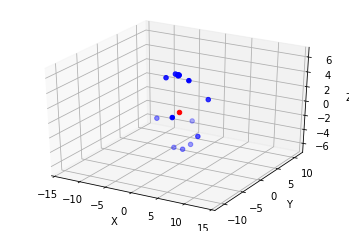

In [5]:
#Abnormal uniform dataset
y_a_dataset  = []
x1_a_dataset = []
x2_a_dataset = []
x3_a_dataset = []
i = 0
while i<size_a:
    found = False
    while not found:
        #longitude entre 0 et 2pi
        longitude = (x_a_values_interval--x_a_values_interval) * np.random.random_sample() + -x_a_values_interval
        #latitude entre -pi/2 et pi/2
        latitude = (y_a_values_interval --y_a_values_interval) * np.random.random_sample() + -y_a_values_interval

        x1 = a_max_cercle * np.cos(latitude) * np.cos(longitude)

        x2 = a_max_cercle * np.cos(latitude) * np.sin(longitude)

        x3 = a_max_cercle * np.sin(latitude)

        distance = np.sqrt(x1**2 + x2**2 + x3**2)
        if distance < a_max_cercle:
            found = True
            
    x1_a_dataset.append(x1)
    x2_a_dataset.append(x2)
    x3_a_dataset.append(x3)
    y_a_dataset.append(param_y_abnormal_data)
    i = i + 1
    
a_data_array = {'0': x1_a_dataset, '1':x2_a_dataset, '2':x3_a_dataset, 'is_normal': y_a_dataset}
a_dataset = pd.DataFrame(a_data_array, columns=['0', '1', '2', 'is_normal'])
#a_dataset

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-x_lim,x_lim)
ax.set_ylim(-y_lim,y_lim)
ax.set_zlim(-7,7)

ax.scatter3D(a_dataset['0'], a_dataset['1'], a_dataset['2'], c="b");
ax.scatter3D(0, 0, 0, c="r");

In [6]:
# Vérification
j = 2
distance = np.sqrt(x1_a_dataset[j]**2 + x2_a_dataset[j]**2 + x3_a_dataset[j]**2)
distance

4.999999999999999

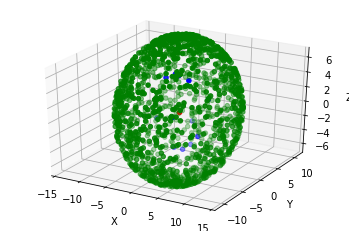

In [7]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-x_lim,x_lim)
ax.set_ylim(-y_lim,y_lim)
ax.set_zlim(-7,7)

ax.scatter3D(n_dataset['0'], n_dataset['1'], n_dataset['2'], c="g");
ax.scatter3D(0, 0, 0, c="r");
ax.scatter3D(a_dataset['0'], a_dataset['1'], a_dataset['2'], c="b");


## Génération du jeu de données complet

In [8]:
dataset = pd.concat([n_dataset, a_dataset], ignore_index=True, sort=False)
dataset

,0,1,2,is_normal
0,-0.699004,-4.424356,8.940720,1
1,1.891688,-4.042286,8.948823,1
2,8.717991,1.406608,-4.692343,1
3,-1.503172,-5.727040,-8.058628,1
4,2.983442,9.271123,2.268339,1
...,...,...,...,...
1510,4.363173,1.623417,1.824073,0
1511,-1.317286,0.853093,4.747314,0
1512,-4.697685,0.521820,-1.630784,0
1513,0.002547,-0.013350,4.999982,0


In [9]:
dataset.describe()

,0,1,2,is_normal
count,1515.000000,1515.000000,1515.000000,1515.000000
mean,-0.186097,0.130337,0.298164,0.990099
std,5.337057,5.544101,6.321482,0.099043
min,-9.987263,-9.994342,-10.000000,0.000000
25%,-4.282598,-4.201864,-5.245595,1.000000
50%,-0.149198,0.182747,0.549573,1.000000
75%,3.743104,4.520438,5.724988,1.000000
max,9.999108,9.954423,9.999989,1.000000


## Créé le fichier .csv du jeu de données

In [10]:
dataset.to_csv(full_file_path, index=None, header=True)